In [140]:
# hdbcli connection test
import pandas as pd
from hana_ml import dataframe as hd
import numpy as np
import matplotlib as plt
import seaborn as sns
%matplotlib inline

In [2]:
# Print multiple statements in same line
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [141]:
conn = hd.ConnectionContext('phd-phd.dmzwdf.sap.corp', 30141, userkey='JSINGH')

HANA DB User :  Password : ········


In [4]:
import datetime
my_date = datetime.date.today() # Today's day
year, week_num, day_of_week = my_date.isocalendar()

Curr_CalWeek = str(year)+str(week_num)
Analysis_CalWeek = str(year)+str(week_num-2)
print("Current Calender Week:",Curr_CalWeek, " Analysis Calendar Week:", Analysis_CalWeek)

Current Calender Week: 202128  Analysis Calendar Week: 202126


In [142]:
from hdbcli import dbapi

In [8]:
conn1 = dbapi.connect('phd-phd.dmzwdf.sap.corp', 30141, userkey='JSINGH')
cursor = conn1.cursor()

In [264]:
sql_drop_view = 'Drop view "I073890"."Fiori_Usage"'
cursor.execute(sql_drop_view)

True

In [265]:
#Creating View by merging tables and collecting 6 weeks data

sql_create_view = 'CREATE VIEW "I073890"."Fiori_Usage" AS \
SELECT odata.CALWEEK, odata.ZEW_SERVICE, odata.SYSTNO, BOM.ZEW_FIORIID,BOM.ZEW_APPNAME, BOM.ZEW_LINE_OF_BUSINESS, BOM.ZEW_ROLENAME,BOM.ZEW_APPCOMPONENT, SESS.CUSTNO, KNA."NAME1" AS CUSTOMER_NAME, KNA."LAND1" AS COUNTRY, KNA."ORT01" AS REGION \
from "CBR2PHD"."/STCSC/ODATA_REQ" odata \
JOIN "CBR2PHD"."/STCSC/FIORI_AIS" FIORI \
ON odata.SESSNO = FIORI.SESSNO \
AND odata.SYSTNO = FIORI.SYSTNO \
JOIN "CBR2PHD"."/STCSC/SYS_TYPE" SESS \
ON ODATA.SYSTNO = SESS.SYSTNO \
JOIN "CBR2PHD"."KNA1" KNA \
ON KNA.KUNNR = SESS.CUSTNO \
JOIN "SHARED_OBJECTS"."/STCSC/FIORI_BOM" BOM \
ON odata.ZEW_SERVICE = BOM.ZEW_PRIMARYODATASERVICE \
AND BOM.ZEW_BSPNAME = FIORI.ZEW_APPL_NAME \
where odata.CALWEEK between \'202024\' and \'202027\''

print (sql_create_view)

cursor.execute(sql_create_view)

CREATE VIEW "I073890"."Fiori_Usage" AS SELECT odata.CALWEEK, odata.ZEW_SERVICE, odata.SYSTNO, BOM.ZEW_FIORIID,BOM.ZEW_APPNAME, BOM.ZEW_LINE_OF_BUSINESS, BOM.ZEW_ROLENAME,BOM.ZEW_APPCOMPONENT, SESS.CUSTNO, KNA."NAME1" AS CUSTOMER_NAME, KNA."LAND1" AS COUNTRY, KNA."ORT01" AS REGION from "CBR2PHD"."/STCSC/ODATA_REQ" odata JOIN "CBR2PHD"."/STCSC/FIORI_AIS" FIORI ON odata.SESSNO = FIORI.SESSNO AND odata.SYSTNO = FIORI.SYSTNO JOIN "CBR2PHD"."/STCSC/SYS_TYPE" SESS ON ODATA.SYSTNO = SESS.SYSTNO JOIN "CBR2PHD"."KNA1" KNA ON KNA.KUNNR = SESS.CUSTNO JOIN "SHARED_OBJECTS"."/STCSC/FIORI_BOM" BOM ON odata.ZEW_SERVICE = BOM.ZEW_PRIMARYODATASERVICE AND BOM.ZEW_BSPNAME = FIORI.ZEW_APPL_NAME where odata.CALWEEK between '202024' and '202027'


True

# EDA

In [266]:
sql_fiori_usage ='SELECT * FROM "I073890"."Fiori_Usage"'

print(sql_fiori_usage)

SELECT * FROM "I073890"."Fiori_Usage"


In [267]:
df_usage = hd.DataFrame(conn, sql_fiori_usage)

In [268]:
df_usage = df_usage.collect()
type(df_usage)

pandas.core.frame.DataFrame

In [269]:
df_usage.shape

(522455, 12)

In [270]:
df_usage.sample(10)

,CALWEEK,ZEW_SERVICE,SYSTNO,ZEW_FIORIID,ZEW_APPNAME,ZEW_LINE_OF_BUSINESS,ZEW_ROLENAME,ZEW_APPCOMPONENT,CUSTNO,CUSTOMER_NAME,COUNTRY,REGION
10181,202027,FAP_MANAGE_PAYMENT_MEDIA,000000000800180511,F1868,Manage Payment Media,"Finance, Sourcing and Procurement, Supply Chain",Accounts Payable Accountant,FI,0000628399,JC DECAUX SA,FR,NEUILLY SUR SEINE
253276,202025,C_PURCHASECONTRACTEXPIRY_CDS,000000000800079262,F0574,Contract Expiry,"Sourcing and Procurement, Supply Chain",Strategic Buyer,MM,0001594863,Budich International GmbH,DE,Hiddenhausen
397724,202024,SMART_BUSINESS_RUNTIME_SRV,000000000850255358,F3182,Cash Collection Tracker - Collections Management,,Accounts Receivable Manager,FIN,0001152937,Zalando SE,DE,Berlin
201194,202025,HCMFAB_LEAVE_REQUEST_CR_SRV,000000000311548425,F1311A,My Leave Requests (Version 3/Fiori 2.0),Human Resources,Employee - HR Info,PA,0000655378,NRW.BANK,DE,Düsseldorf
165550,202025,APJ_JOB_MANAGEMENT_SRV,000000000500053485,F1518,Schedule Billing Release,"Commerce, Finance, Sales, Service",Billing Clerk,SD,0001573836,WEGMANN Automotive USA Inc,US,MURFREESBORO
384272,202027,TASKPROCESSING,000000000800079318,F0545A,My Inbox - Approve Supplier Invoice,"Sourcing and Procurement, Supply Chain",Manager - Finance Info,CA,0000014924,HARIBO GmbH & Co. KG,DE,Grafschaft
182724,202024,TASKPROCESSING,000000000850474153,F0402A,My Inbox - Approve Purchase Order,"Finance, Sourcing and Procurement, Supply Chain",Purchasing Manager,MM,0000734179,"Dassian, Inc.",US,SCOTTSDALE
71641,202027,HCM_LEAVE_REQ_CREATE_SRV,000000000310706395,F1311,My Leave Requests (Version 2),Human Resources,Employee - HR Info,PA,0000205419,NBU,UA,Kiev
222799,202024,BSANLY_APF_RUNTIME_SRV,000000000850158624,F3273,Inspection Lot Detailed Analytics,"Asset Management, Manufacturing, Sustainability",Quality Manager,QM,0001248042,Bru Textiles NV,BE,Kontich
417673,202024,TASKPROCESSING,000000000800309337,F2797,My Inbox for Manage Bank Accounts,,Cash Manager,CA,0000666637,Borusan Otomotiv,TR,ISTANBUL


In [9]:
#df_usage.to_csv("C:\\JYO DATA\\SAP\\Innovator Challenge\\App_Usage.csv")

My Inbox - Approve Service Entry Sheets                              13121
My Inbox - Approve Purchase Order                                    13121
Approve Reconciliation Close Requests - Inbox                        13121
My Inbox for Manage Bank Accounts                                    13121
Verify Journal Entries in General Ledger - For Processor (Outbox)    13121
My Inbox - Approve Supplier Invoice                                  13121
Verify Journal Entries in General Ledger - For Processor (Inbox)     13121
My Inbox                                                             13121
My Inbox - Maintenance Management                                    13121
My SAP EarlyWatch Alert Reports                                       9628
Name: ZEW_APPNAME, dtype: int64

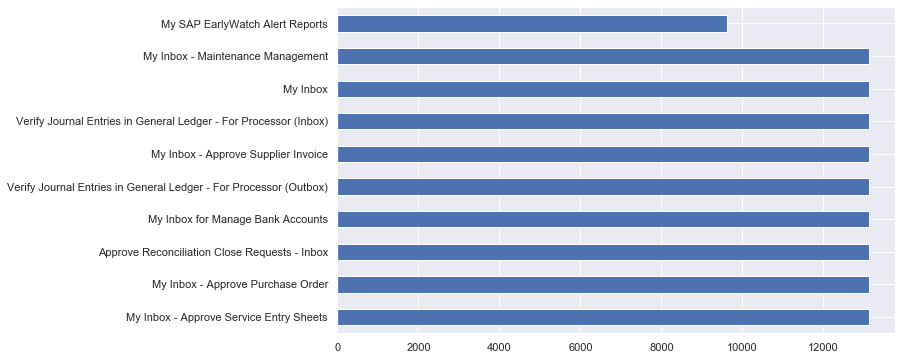

In [271]:
#Top 10 Apps used
df_usage['ZEW_APPNAME'].value_counts()[:10]
df_usage['ZEW_APPNAME'].value_counts()[:10].plot(kind='barh')

In [272]:
#Grouping based on Customer's usage in 6 weeks
sql_fiori_count = 'Select CALWEEK,CUSTNO, CUSTOMER_NAME, COUNTRY, REGION, ZEW_FIORIID as FIORIID,ZEW_APPNAME as APPNAME,ZEW_LINE_OF_BUSINESS as LOB,ZEW_ROLENAME as ROLE_NAME,ZEW_APPCOMPONENT as APP_COMP, count(ZEW_FIORIID) as USAGE_COUNT \
from "I073890"."Fiori_Usage" \
GROUP BY CALWEEK, CustNO, CUSTOMER_NAME, COUNTRY, REGION, ZEW_FIORIID,ZEW_APPNAME,ZEW_LINE_OF_BUSINESS,ZEW_ROLENAME, ZEW_APPCOMPONENT \
ORDER BY USAGE_COUNT DESC'

print(sql_fiori_count)

Select CALWEEK,CUSTNO, CUSTOMER_NAME, COUNTRY, REGION, ZEW_FIORIID as FIORIID,ZEW_APPNAME as APPNAME,ZEW_LINE_OF_BUSINESS as LOB,ZEW_ROLENAME as ROLE_NAME,ZEW_APPCOMPONENT as APP_COMP, count(ZEW_FIORIID) as USAGE_COUNT from "I073890"."Fiori_Usage" GROUP BY CALWEEK, CustNO, CUSTOMER_NAME, COUNTRY, REGION, ZEW_FIORIID,ZEW_APPNAME,ZEW_LINE_OF_BUSINESS,ZEW_ROLENAME, ZEW_APPCOMPONENT ORDER BY USAGE_COUNT DESC


In [273]:
df_usage_count = hd.DataFrame(conn, sql_fiori_count)

In [274]:
df_usage_count = df_usage_count.collect()

In [275]:
df_usage_count.shape
# Get summary statistics of Usage Count
df_usage_count['USAGE_COUNT'].describe()

(159112, 11)

count    159112.000000
mean          3.283568
std           2.585123
min           1.000000
25%           1.000000
50%           3.000000
75%           4.000000
max          50.000000
Name: USAGE_COUNT, dtype: float64

In [279]:
df_usage_count.sample(10)

,CALWEEK,CUSTNO,CUSTOMER_NAME,COUNTRY,REGION,FIORIID,APPNAME,LOB,ROLE_NAME,APP_COMP,USAGE_COUNT
141335,202026,0001417767,RIVACOLD SRL,IT,SANT'ANGELO IN LIZZOLA,F1579,Clear G/L Accounts,Finance,General Ledger Accountant,FI,1
128744,202027,0000513083,Constellation Brands,US,Victor,F1661,Supplier Evaluation by Quantity,"Sourcing and Procurement, Supply Chain",Strategic Buyer,MM,1
123286,202025,0001186096,BUSINESS AT WORK,FR,PARIS,F2128,Create Incident,,Employee - Incidents (Solution Manager),SV,1
31323,202025,0000234874,IMERYS,FR,PARIS,F3961,Impact of Monitoring Lists on Suppliers,"R&D/Engineering, Supply Chain, Sustainability",Product Stewardship Specialist - Product Compl...,EHS,5
131176,202025,0000818463,Macquarie Group Services,AU,SYDNEY,F1354,Check System Recommendations,,System Administrator (Solution Manager),SV,1
71952,202027,0001818871,Saudi Entertainment Ventures,SA,Riyadh,F0718,Post General Journal Entries,Finance,General Ledger Accountant,FI,3
107423,202024,0001676264,Bloom Properties LLC,AE,Abu Dhabi,F1367,Clear Outgoing Payments,"Finance, Sales, Sourcing and Procurement, Supp...",Accounts Payable Accountant,FI,2
141684,202027,0001614845,Elseco Limited,AE,Dubai,F1611,My Open Worklists,"Commerce, Finance, Sales",Accounts Payable and Receivable Manager (FI-CA),FI,1
97549,202025,0001089907,Innogy SE,DE,Essen,F2806,Schedule Transfer of Customers - Global Trade ...,Finance,Administrator - International Trade,SLL,3
137144,202026,0000978264,ACCO Brands Corporation,US,Lake Zurich,F1428,My Business Requirements,,Business Process Specialist (Solution Manager),SV,1


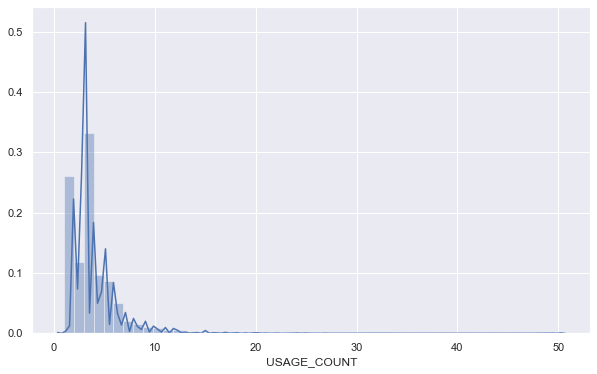

In [280]:
sns.set_style('whitegrid')
sns.set(font_scale=1.5)
%matplotlib inline
#define figure size
sns.set(rc={"figure.figsize":(10, 6)}) #width=6, height=5

# Display distribution of Usage Count
sns.distplot(df_usage_count['USAGE_COUNT'].fillna(df_usage_count['USAGE_COUNT'].median()))

Text(0.5, 0, 'Usage Count')

Text(0, 0.5, 'Appication Component')

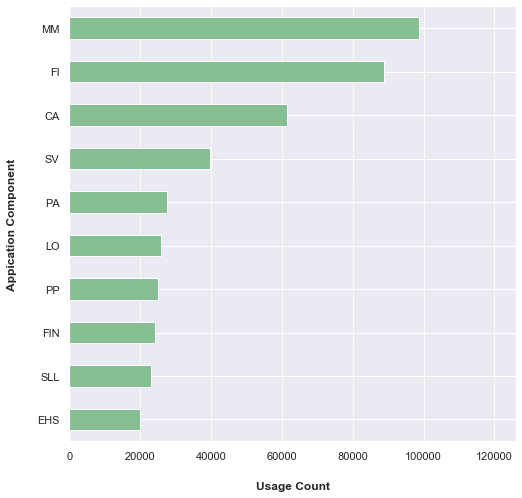

In [281]:
#Top 10 App component used in 6 weeks
x = df_usage_count.groupby(['APP_COMP'])['USAGE_COUNT'].sum().sort_values().tail(10).plot(kind='barh', figsize=(8, 8), color='#86bf91', zorder=2, width=0.5)

# Set x-axis label
x.set_xlabel("Usage Count", labelpad=20, weight='bold', size=12)

# Set y-axis label
x.set_ylabel("Appication Component", labelpad=20, weight='bold', size=12)

# Draw vertical axis lines
vals = x.get_xticks()
for tick in vals:
    x.axvline(x=tick, linestyle='dashed', alpha=0.4, color='#eeeeee', zorder=1)

In [282]:
df_usage_count.to_csv("C:\\JYO DATA\\SAP\\Innovator Challenge\\App_Usage_count.csv")

# Content Based Recommendation

The Content-Based Recommender relies on the similarity of the items being recommended. The basic idea is that if you like an item, then you will also like a “similar” item. It generally works well when it's easy to determine the context/properties of each item.
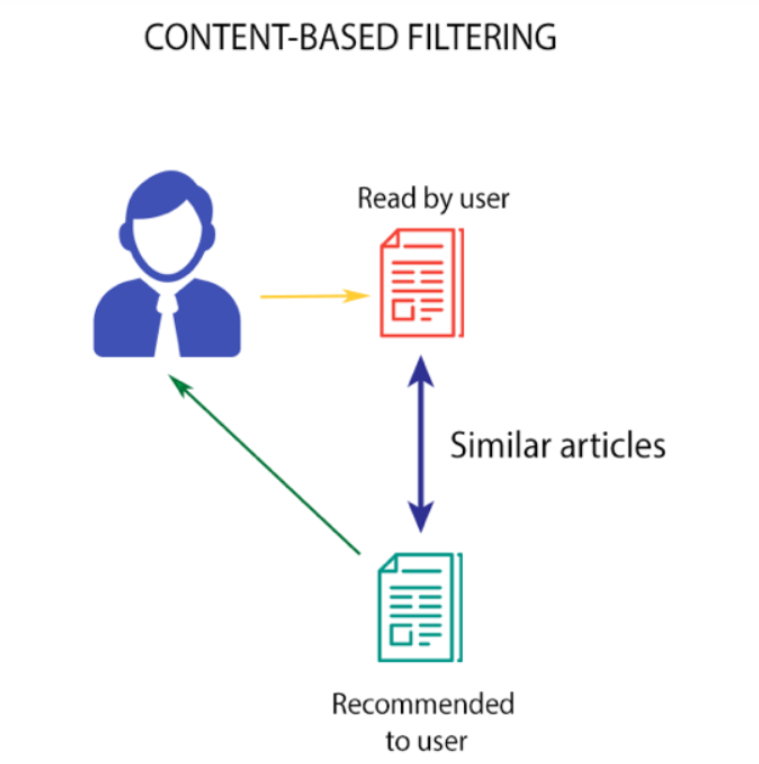

In [156]:
sql_app_features = 'Select ZEW_FIORIID, ZEW_APPNAME, ZEW_LINE_OF_BUSINESS,ZEW_ROLENAME,ZEW_APPCOMPONENT \
from "SHARED_OBJECTS"."/STCSC/FIORI_BOM" where ZEW_PRODUCT_SUITE = \'S/4HANA\''

print(sql_app_features)

Select ZEW_FIORIID, ZEW_APPNAME, ZEW_LINE_OF_BUSINESS,ZEW_ROLENAME,ZEW_APPCOMPONENT from "SHARED_OBJECTS"."/STCSC/FIORI_BOM" where ZEW_PRODUCT_SUITE = 'S/4HANA'


In [157]:
df_app_features = hd.DataFrame(conn, sql_app_features)

In [158]:
df_app_features = df_app_features.collect()

In [159]:
df_app_features.shape
df_app_features.head()

(1802, 5)

,ZEW_FIORIID,ZEW_APPNAME,ZEW_LINE_OF_BUSINESS,ZEW_ROLENAME,ZEW_APPCOMPONENT
0,F0029A,Sales Order Fulfillment Issues (Version 2),"Finance, Marketing, Sales, Service, Sourcing a...",Internal Sales Representative,SD
1,F0046A,Customer Master FactSheets,,Master Data Specialist - Business Partner Data,LO
2,F0232A,Inbound Delivery (S/4HANA),"Asset Management, Sales, Sourcing and Procurem...",Receiving Specialist,LE
3,F0233A,Outbound Delivery (S/4HANA),"Sales, Service, Sourcing and Procurement, Supp...",Shipping Specialist,LE
4,F0234A,Returns Delivery (S/4HANA),"Sales, Service, Sourcing and Procurement, Supp...",Shipping Specialist,LE


In [160]:
#Merge App features
def create_features(x):
    feature = x['ZEW_LINE_OF_BUSINESS'].replace(',',' ') + ' ' + x['ZEW_ROLENAME'] + ' '+ x['ZEW_APPCOMPONENT']
    #print(feature )
    return feature

In [161]:
# Create the merged feature
df_app_features['features'] = df_app_features.apply(create_features, axis=1)

In [162]:
df_app_features.head()

,ZEW_FIORIID,ZEW_APPNAME,ZEW_LINE_OF_BUSINESS,ZEW_ROLENAME,ZEW_APPCOMPONENT,features
0,F0029A,Sales Order Fulfillment Issues (Version 2),"Finance, Marketing, Sales, Service, Sourcing a...",Internal Sales Representative,SD,Finance Marketing Sales Service Sourcing a...
1,F0046A,Customer Master FactSheets,,Master Data Specialist - Business Partner Data,LO,Master Data Specialist - Business Partner Dat...
2,F0232A,Inbound Delivery (S/4HANA),"Asset Management, Sales, Sourcing and Procurem...",Receiving Specialist,LE,Asset Management Sales Sourcing and Procurem...
3,F0233A,Outbound Delivery (S/4HANA),"Sales, Service, Sourcing and Procurement, Supp...",Shipping Specialist,LE,Sales Service Sourcing and Procurement Supp...
4,F0234A,Returns Delivery (S/4HANA),"Sales, Service, Sourcing and Procurement, Supp...",Shipping Specialist,LE,Sales Service Sourcing and Procurement Supp...


In [163]:
#from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import linear_kernel

In [164]:
#tf = TfidfVectorizer(analyzer='word', ngram_range=(1, 3), min_df=0, stop_words='english')
#tfidf_matrix = tf.fit_transform(df_app_features[ 'ZEW_APPCOMPONENT'])
#tfidf_matrix = tf.fit_transform(df_app_features[ 'features'])

In [165]:
#print(tfidf_matrix)

In [166]:
# Import CountVectorizer and create the count matrix
from sklearn.feature_extraction.text import CountVectorizer

In [167]:
count = CountVectorizer(stop_words='english')
count_matrix = count.fit_transform(df_app_features['features'])

In [168]:
#cosine_similarities = linear_kernel(tfidf_matrix, tfidf_matrix)
cosine_similarities = linear_kernel(count_matrix, count_matrix)

In [171]:
results = {}

In [177]:
for idx, row in df_app_features.iterrows():
    similar_indices = cosine_similarities[idx].argsort()[:-100:-1]
    similar_items = [(cosine_similarities[idx][i], df_app_features['ZEW_FIORIID'][i], df_app_features['ZEW_APPNAME'][i]) for i in similar_indices]

    results[row['ZEW_FIORIID']] = similar_items[1:]
    
    

In [207]:
def item(id):
    
    Fiori_ID = df_app_features.loc[df_app_features['ZEW_FIORIID'] == id]['ZEW_FIORIID'].tolist()[0].split(' - ')[0]
    App_Name = df_app_features.loc[df_app_features['ZEW_FIORIID'] == id]['ZEW_APPNAME'].tolist()[0].split(' - ')[0]
    #print(Fiori_ID,App_Name )
    return Fiori_ID,App_Name

In [216]:
# Just reads the results out of the dictionary.
def recommend(item_id, num):
    fiori_id, app_name = item(item_id)
    print("Recommending " + str(num) + " products SIMILAR to " , fiori_id,", " , app_name,":")
    print("-------------------------------------------------------")
    recs = results[item_id][:num+1]
    #print(recs)
    count = 1
    for rec in recs:
        item_rec = rec[1]
        item_name = rec[2]
        score = str(rec[0])
        #print(item_rec, score)
        if (item_rec != item_id):
            #print("Recommended: " + item(rec[1]) + " (score:" + str(rec[0]) + ")")
            print("Recommended Fiori ID", count ,": "+item_rec +", App Name: " + item_name +" (score:"+score+")")
            count = count + 1

In [217]:
recommend(item_id='F0046A', num=10)

Recommending 10 products SIMILAR to  F0046A ,  Customer Master FactSheets :
-------------------------------------------------------
Recommended Fiori ID 1 : F1053A, App Name: Manage Supplier Master Data (score:9.0)
Recommended Fiori ID 2 : F3163, App Name: Manage Business Partner Master Data (score:9.0)
Recommended Fiori ID 3 : F0850A, App Name: Manage Customer Master Data (score:9.0)
Recommended Fiori ID 4 : F4810, App Name: Analyze Completed Work Items from Change Requests for Financial Master Data (score:9.0)
Recommended Fiori ID 5 : F3428, App Name: Master Data Process Overview for Financial Data (score:9.0)
Recommended Fiori ID 6 : F3427, App Name: Change Request Analysis for Financial Data (score:9.0)
Recommended Fiori ID 7 : F3140, App Name: Change Process Analysis for Business Partner (score:8.0)
Recommended Fiori ID 8 : F3989, App Name: Validate and standardize address data (score:8.0)
Recommended Fiori ID 9 : F4752, App Name: Monitor Open Work Items from Change Requests for B

# Collaborative Filtering

### Create a cross-tab for better visualization of Customers and Fiori Ids

In [218]:
#df_usage_count = pd.read_csv("C:\\JYO DATA\\SAP\\Innovator Challenge\\App_Usage_count.csv")
df_usage_count.head(5)

,CALWEEK,CUSTNO,FIORIID,LOB,ROLE_NAME,APP_COMP,USAGE_COUNT
0,202024,0000323561,F0545A,"Sourcing and Procurement, Supply Chain",Manager - Finance Info,CA,50
1,202024,0000323561,F0862,,Manager,CA,50
2,202027,0000323561,F0862,,Manager,CA,50
3,202027,0000323561,F0545A,"Sourcing and Procurement, Supply Chain",Manager - Finance Info,CA,50
4,202027,0000323561,F5000,Finance,General Ledger Accountant - Intercompany,CA,50


In [219]:
n_custs=int(df_usage_count.CUSTNO.nunique())
n_apps=int(df_usage_count.FIORIID.nunique())

In [220]:
print("no_Custs = ",n_custs, "||", "no_apps = ", n_apps )

no_Custs =  3418 || no_apps =  1371


In [221]:
cust = df_usage_count.groupby('CUSTNO')['USAGE_COUNT'].count()
#topCust = cust.sort_values(ascending = False)[:15]

app = df_usage_count.groupby('FIORIID')['USAGE_COUNT'].count()
#topApp = app.sort_values(ascending = False)[:15]

In [222]:
# gettings Usage of top Customers and top Apps

#join1 = df_usage_count.join(topCust, on='CUSTNO', how = 'inner', rsuffix='_r')
#join1 = join1.join(topApp, on='FIORIID', how = 'inner', rsuffix = '_r')
join1 = df_usage_count.join(cust, on='CUSTNO', how = 'inner', rsuffix='_r')
join1 = join1.join(app, on='FIORIID', how = 'inner', rsuffix = '_r')

pd.crosstab(join1.CUSTNO, join1.FIORIID, join1.USAGE_COUNT, aggfunc=np.sum).fillna(0)

FIORIID,F0002,F0003,F0004,F0005,F0006,F0012,F0014,F0016,F0017,F0018,...,F4960,F4961,F4962,F4963,F4969,F4993,F5000,F5001,F5010,F5011
CUSTNO,,,,,,,,,,,,,,,,,,,,,
0000010004,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0000010010,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,8.0,3.0,8.0,8.0,16.0,28.0,61.0,8.0,3.0,8.0
0000010013,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0000010014,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0000010018,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0001943918,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0001959753,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0002016698,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### Collaborative filtering using Surprise Library

In [75]:
from surprise import KNNBasic, SVD, NMF, NormalPredictor,KNNBaseline, KNNWithMeans, BaselineOnly
from surprise import Reader, Dataset

from surprise.model_selection import cross_validate

In [225]:
# A reader is still needed but only the rating_scale param is requiered.
reader = Reader(rating_scale=(0.5, 50.0))

# The columns must correspond to user id, item id and ratings (in that order).
data = Dataset.load_from_df(df_usage_count[['CUSTNO', 'FIORIID', 'USAGE_COUNT']],reader)
data

In [37]:
# Split data into 5 folds

#data.split(n_folds=5)

In [78]:
benchmark = []
# Iterate over all algorithms
for algorithm in [SVD(), NMF(), NormalPredictor(), KNNBaseline(), KNNBasic(), KNNWithMeans()]:
    # Perform cross validation
    results = cross_validate(algorithm, data, measures=['RMSE'], cv=3, verbose=False)
    
    # Get results & append algorithm name
    tmp = pd.DataFrame.from_dict(results).mean(axis=0)
    tmp = tmp.append(pd.Series([str(algorithm).split(' ')[0].split('.')[-1]], index=['Algorithm']))
    benchmark.append(tmp)
    
pd.DataFrame(benchmark).set_index('Algorithm').sort_values('test_rmse')  

Estimating biases using als...
Computing the msd similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the msd similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.


,test_rmse,fit_time,test_time
Algorithm,,,
SVD,1.151123,25.912341,1.567757
NMF,1.216256,26.107415,1.411458
KNNBasic,1.254669,23.375037,122.090725
KNNBaseline,1.306006,22.581328,137.830124
KNNWithMeans,1.439084,22.316597,126.971013
NormalPredictor,3.458504,0.741678,1.708693


In [226]:
# Use the SVD algorithm.
svd = SVD()

# Compute the RMSE of the SVD algorithm.
cross_validate(svd, data, measures=['RMSE','MAE'], cv=6)

{'test_rmse': array([1.1213693 , 1.14732526, 1.15803537, 1.11549913, 1.10207209,
        1.15172854]),
 'test_mae': array([0.60167086, 0.59736151, 0.60282986, 0.59482547, 0.58686023,
        0.59264637]),
 'fit_time': (36.44855308532715,
  37.54064464569092,
  36.755173444747925,
  33.02631139755249,
  31.80143976211548,
  33.276190519332886),
 'test_time': (2.571347713470459,
  1.8657300472259521,
  1.1108238697052002,
  0.793370246887207,
  0.8910605907440186,
  0.8451097011566162)}

In [115]:
from surprise.model_selection import train_test_split
from surprise import accuracy

trainset, testset = train_test_split(data, test_size=0.25)
algo = SVD()
predictions = algo.fit(trainset).test(testset)
accuracy.rmse(predictions)

RMSE: 1.1212


1.1211604476679986

In [116]:
df_usage_count[df_usage_count['CUSTNO'] == 1720337] #Cust ID = 5

,CALWEEK,CUSTNO,FIORIID,LOB,ROLE_NAME,APP_COMP,USAGE_COUNT
15445,202026,1720337,F1315,Human Resources,Manager - HR Info,PA,7
17195,202026,1720337,F5000,Finance,General Ledger Accountant - Intercompany,CA,6
17385,202027,1720337,F5000,Finance,General Ledger Accountant - Intercompany,CA,6
17482,202023,1720337,F2797,NaN,Cash Manager,CA,6
18231,202023,1720337,F5000,Finance,General Ledger Accountant - Intercompany,CA,6
18326,202027,1720337,F2797,NaN,Cash Manager,CA,6
18438,202026,1720337,F2797,NaN,Cash Manager,CA,6
19423,202026,1720337,F2728,Finance,General Ledger Accountant,FI,6
19441,202023,1720337,F2953,"Asset Management, Finance, Manufacturing, Service",Maintenance Planner,PM,6
19636,202027,1720337,F2953,"Asset Management, Finance, Manufacturing, Service",Maintenance Planner,PM,6


In [120]:
svd.predict(1720337, 'F1315')

Prediction(uid=1720337, iid='F1315', r_ui=None, est=4.887286605280307, details={'was_impossible': False})

## SKLEARN SVD Model

In [121]:
df_usage_count = pd.read_csv("C:\\JYO DATA\\SAP\\Innovator Challenge\\editedLong_App_Usage_count.csv")
df_usage_count.head()

,CALWEEK,CUSTNO,FIORIID,LOB,ROLE_NAME,APP_COMP,USAGE_COUNT,cust_idx,fiori_idx,role_name,app_comp,USAGE_COUNT_NORM
0,202024,323561,F0402A,"Finance, Sourcing and Procurement, Supply Chain",Purchasing Manager,MM,50.0,1773.0,504.0,88.0,15.0,4.0
1,202027,323561,F0402A,"Finance, Sourcing and Procurement, Supply Chain",Purchasing Manager,MM,50.0,1773.0,504.0,88.0,15.0,4.0
2,202027,323561,F0862,NaN,Manager,CA,50.0,1773.0,404.0,89.0,8.0,4.0
3,202024,323561,F0862,NaN,Manager,CA,50.0,1773.0,404.0,89.0,8.0,4.0
4,202024,323561,F5000,Finance,General Ledger Accountant - Intercompany,CA,50.0,1773.0,416.0,154.0,8.0,4.0


In [122]:
n_custs=int(df_usage_count.cust_idx.nunique())
n_apps=int(df_usage_count.FIORIID.nunique())

In [123]:
print("no_Custs = ",n_custs, "||", "no_apps = ", n_apps )

no_Custs =  2501 || no_apps =  830


In [124]:
cust = df_usage_count.groupby('cust_idx')['USAGE_COUNT'].count()
#topCust = cust.sort_values(ascending = False)[:50]

app = df_usage_count.groupby('FIORIID')['USAGE_COUNT'].count()
#topApp = app.sort_values(ascending = False)[:50]

In [125]:
# gettings Usage of top Customers and top Apps

#join1 = df_usage_count.join(topCust, on='CUSTNO', how = 'inner', rsuffix='_r')
#join1 = join1.join(topApp, on='FIORIID', how = 'inner', rsuffix = '_r')
join1 = df_usage_count.join(cust, on='cust_idx', how = 'inner', rsuffix='_r')
join1 = join1.join(app, on='FIORIID', how = 'inner', rsuffix = '_r')

Usage = pd.crosstab(join1.cust_idx, join1.FIORIID, join1.USAGE_COUNT, aggfunc=np.sum).fillna(0)
Usage.head(10)

FIORIID,F0002,F0003,F0004,F0005,F0006,F0012,F0014,F0018,F0019,F0020,...,F4960,F4961,F4962,F4963,F4969,F4993,F5000,F5001,F5010,F5011
cust_idx,,,,,,,,,,,,,,,,,,,,,
0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,6.0,0.0,0.0,0.0,0.0
2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,36.0,0.0,0.0,0.0
3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,23.0,0.0,0.0,0.0
6.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,33.0,0.0,0.0,0.0
7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [126]:
U = Usage.to_numpy()
user_usage_mean = np.mean(U, axis = 1)
Usage_demeaned = U - user_usage_mean.reshape(-1, 1)
#Usage_demeaned

In [127]:
sparsity = round(1.0 - len(df_usage_count) / float(n_custs * n_apps), 3)
print ('The sparsity level of Firoi App dataset is ' ,str(sparsity * 100), '%')

The sparsity level of Firoi App dataset is  96.5 %


In [128]:
from scipy.sparse.linalg import svds
U, sigma, Vt = svds(Usage_demeaned, k = 50)

In [129]:
sigma = np.diag(sigma)

In [130]:
all_user_predicted_usage = np.dot(np.dot(U, sigma), Vt) + user_usage_mean.reshape(-1, 1)

In [131]:
preds = pd.DataFrame(all_user_predicted_usage, columns = Usage.columns)
preds.head()

FIORIID,F0002,F0003,F0004,F0005,F0006,F0012,F0014,F0018,F0019,F0020,...,F4960,F4961,F4962,F4963,F4969,F4993,F5000,F5001,F5010,F5011
0,-0.100601,-0.284541,-0.099538,-0.260854,-0.037001,-0.112295,-0.112994,-0.011623,-0.013010,-0.013010,...,-0.006255,1.545561,-0.006255,-0.006255,0.023741,6.005438,-0.018719,-0.006255,1.545561,-0.006255
1,0.117977,0.367978,0.116880,-0.084137,0.062694,-0.004223,0.030699,0.082638,0.079801,0.079801,...,-0.003526,0.043168,-0.003526,-0.003526,0.035706,-0.010134,35.989307,-0.003526,0.043168,-0.003526
2,0.054086,0.123919,0.054319,0.042309,0.012457,-0.011975,-0.025452,-0.002831,-0.000422,-0.000422,...,0.000943,0.000328,0.000943,0.000943,0.000551,0.000448,0.000505,0.000943,0.000328,0.000943
3,-0.239769,1.094883,-0.236786,0.981571,0.137106,0.447448,0.451916,0.000616,0.003493,0.003493,...,0.012272,-0.177963,0.012272,0.012272,0.018059,-0.006030,0.001097,0.012272,-0.177963,0.012272
4,-0.058314,-0.051176,-0.057446,0.093425,-0.011278,-0.002823,-0.002118,-0.019820,-0.018198,-0.018198,...,0.014696,-0.032758,0.014696,0.014696,0.005214,-0.002106,22.984961,0.014696,-0.032758,0.014696


In [132]:
def recommend_apps(predictions, custID, apps, original_usage, num_recommendations):
    
    # Get and sort the user's predictions
    #user_row_number = custID - 1 # User ID starts at 1, not 0
    user_row_number = custID # User ID starts at 0
    #print(user_row_number)
    sorted_user_predictions = preds.iloc[user_row_number].sort_values(ascending=False) # User ID starts at 1
    
    # Get the user's data and merge in the movie information.
    user_data = original_usage[original_usage.cust_idx == (custID)]
    #print(apps.head())
    #print(user_data)
    user_full = (user_data.merge(apps, how = 'left', left_on = 'FIORIID', right_on = 'ZEW_FIORIID').
                     sort_values(['USAGE_COUNT'], ascending=False)
                 )
    #print(user_full)
    print ('User {0} has already used {1} apps.'.format(custID, user_full.shape[0]))
    print ('Recommending highest {0} predicted used apps not already used.'.format(num_recommendations))
    
    # Recommend the highest predicted rating movies that the user hasn't seen yet.
    recommendations = (df_app_features[~df_app_features['ZEW_FIORIID'].isin(user_full['ZEW_FIORIID'])].merge(pd.DataFrame(sorted_user_predictions).reset_index(), 
                       how = 'left',left_on = 'ZEW_FIORIID',right_on = 'FIORIID').rename(columns = {user_row_number: 'Predictions'}).
                       sort_values('Predictions', ascending = False).
                       iloc[:num_recommendations, :-1])

    return user_full, recommendations

In [133]:
already_rated, predictions = recommend_apps(preds, 5, df_app_features, df_usage_count, 10)

User 5 has already used 40 apps.
Recommending highest 10 predicted used apps not already used.


In [134]:
# Top 20 apps that User 5 has used 
already_rated.head(20)

,CALWEEK,CUSTNO,FIORIID,LOB,ROLE_NAME,APP_COMP,USAGE_COUNT,cust_idx,fiori_idx,role_name,app_comp,USAGE_COUNT_NORM,ZEW_FIORIID,ZEW_APPNAME,ZEW_LINE_OF_BUSINESS,ZEW_ROLENAME,ZEW_APPCOMPONENT,features
0,202026,1720337,F1315,Human Resources,Manager - HR Info,PA,7.0,5.0,962.0,187.0,33.0,4.000000,NaN,NaN,NaN,NaN,NaN,NaN
15,202023,1720337,F0402A,"Finance, Sourcing and Procurement, Supply Chain",Purchasing Manager,MM,6.0,5.0,504.0,88.0,15.0,3.333333,F0402A,My Inbox - Approve Purchase Order,"Finance, Sourcing and Procurement, Supply Chain",Purchasing Manager,MM,Finance Sourcing and Procurement Supply Chai...
27,202027,1720337,F0545A,"Sourcing and Procurement, Supply Chain",Manager - Finance Info,CA,6.0,5.0,957.0,63.0,8.0,3.333333,F0545A,My Inbox - Approve Supplier Invoice,"Sourcing and Procurement, Supply Chain",Manager - Finance Info,CA,Sourcing and Procurement Supply Chain Manager...
26,202026,1720337,F0545A,"Sourcing and Procurement, Supply Chain",Manager - Finance Info,CA,6.0,5.0,957.0,63.0,8.0,3.333333,F0545A,My Inbox - Approve Supplier Invoice,"Sourcing and Procurement, Supply Chain",Manager - Finance Info,CA,Sourcing and Procurement Supply Chain Manager...
25,202023,1720337,F0545A,"Sourcing and Procurement, Supply Chain",Manager - Finance Info,CA,6.0,5.0,957.0,63.0,8.0,3.333333,F0545A,My Inbox - Approve Supplier Invoice,"Sourcing and Procurement, Supply Chain",Manager - Finance Info,CA,Sourcing and Procurement Supply Chain Manager...
24,202023,1720337,F2446,"Finance, Sourcing and Procurement, Supply Chain",Employee - Procurement,MM,6.0,5.0,231.0,52.0,15.0,3.333333,F2446,My Inbox - Approve Service Entry Sheets,"Finance, Sourcing and Procurement, Supply Chain",Employee - Procurement,MM,Finance Sourcing and Procurement Supply Chai...
23,202027,1720337,F2729,Finance,General Ledger Accountant,FI,6.0,5.0,1170.0,156.0,1.0,3.333333,F2729,Verify Journal Entries in General Ledger - For...,Finance,General Ledger Accountant,FI,Finance General Ledger Accountant FI
22,202026,1720337,F2729,Finance,General Ledger Accountant,FI,6.0,5.0,1170.0,156.0,1.0,3.333333,F2729,Verify Journal Entries in General Ledger - For...,Finance,General Ledger Accountant,FI,Finance General Ledger Accountant FI
21,202026,1720337,F2446,"Finance, Sourcing and Procurement, Supply Chain",Employee - Procurement,MM,6.0,5.0,231.0,52.0,15.0,3.333333,F2446,My Inbox - Approve Service Entry Sheets,"Finance, Sourcing and Procurement, Supply Chain",Employee - Procurement,MM,Finance Sourcing and Procurement Supply Chai...
1,202026,1720337,F5000,Finance,General Ledger Accountant - Intercompany,CA,6.0,5.0,416.0,154.0,8.0,3.333333,F5000,Approve Reconciliation Close Requests - Inbox,Finance,General Ledger Accountant - Intercompany,CA,Finance General Ledger Accountant - Intercompa...


In [135]:
# Top 10 apps that User 5 hopefully will use
predictions

,ZEW_FIORIID,ZEW_APPNAME,ZEW_LINE_OF_BUSINESS,ZEW_ROLENAME,ZEW_APPCOMPONENT,features,FIORIID
209,F1685,Record Inspection Results,"Asset Management, Manufacturing, Supply Chain,...",Quality Technician,QM,Asset Management Manufacturing Supply Chain ...,F1685
136,F1380,Purchase Order Average Delivery Time,"Sourcing and Procurement, Supply Chain",Strategic Buyer,MM,Sourcing and Procurement Supply Chain Strateg...,F1380
479,F2271,Sales Volume - Profit Margin / Credit Memos,"Finance, Marketing, Sales, Service",Sales Manager,SD,Finance Marketing Sales Service Sales Manag...,F2271
165,F1564,Manage Bank Statements,"Finance, Sales",Cash Management Specialist,FI,Finance Sales Cash Management Specialist FI,F1564
131,F1366A,Manage Bank Accounts,Finance,Cash Manager,FIN,Finance Cash Manager FIN,F1366A
25,F0401A,My Inbox - Approve Purchase Requisitions,"Sourcing and Procurement, Supply Chain",Manager - Procurement,CA,Sourcing and Procurement Supply Chain Manager...,F0401A
190,F1640,Purchase Requisition,"Sourcing and Procurement, Supply Chain",Employee - Procurement,MM,Sourcing and Procurement Supply Chain Employe...,F1640
508,F2328,Display Dunning History,"Finance, Sales, Sourcing and Procurement, Supp...",Accounts Receivable Accountant,FI,Finance Sales Sourcing and Procurement Supp...,F2328
423,F2200,My Sales Overview,"Finance, Marketing, Sales, Service, Sourcing a...",Internal Sales Representative,SD,Finance Marketing Sales Service Sourcing a...,F2200
238,F1738,Collection Progress,"Finance, Sales",Accounts Receivable Manager,FIN,Finance Sales Accounts Receivable Manager FIN,F1738


### Residual Modelling

In [11]:
from __future__ import print_function, division
from builtins import range, input

In [25]:
import matplotlib.pyplot as pylt

In [12]:
import pickle
from sklearn.utils import shuffle
from keras.models import Model
from keras.layers import Input, Embedding, Dot, Add, Flatten, Dense, Concatenate
from keras.layers import Dropout, BatchNormalization, Activation
from keras.regularizers import l2
from keras.optimizers import SGD, Adam

Using TensorFlow backend.
C:\Users\I073890\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\I073890\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\I073890\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\I073890\Anaconda3\lib\site-packages\tensorflow\python\framework\d

In [13]:
# load in the pre-processed data
df = pd.read_csv('C:\\JYO DATA\\SAP\\Innovator Challenge\\edited_App_Usage_count.csv')

In [15]:
N = df.cust_idx.max() + 1 # number of Customers
M = df.fiori_idx.max() + 1 # number of Apps

print("Number of Customers: ",N)
print("Number of Apps: ",M)

Number of Customers:  2214
Number of Apps:  1205


In [16]:
#split into train and test
df = shuffle(df)
cutoff = int(0.8*len(df))
df_train = df.iloc[:cutoff]
df_test = df.iloc[cutoff:]

In [35]:
# initialize variables
K = 10 # latent dimensionality
mu = df_train.USAGE_COUNT.mean()
epochs = 15
reg = 0 # regularization penalty

In [36]:
# keras model
u = Input(shape=(1,))
m = Input(shape=(1,))
u_embedding = Embedding(N, K)(u) # (N, 1, K)
m_embedding = Embedding(M, K)(m) # (N, 1, K)

In [37]:
##### main branch (Matrix Facorization)
u_bias = Embedding(N, 1)(u) # (N, 1, 1)
m_bias = Embedding(M, 1)(m) # (N, 1, 1)
x = Dot(axes=2)([u_embedding, m_embedding]) # (N, 1, 1)
x = Add()([x, u_bias, m_bias])
x = Flatten()(x) # (N, 1)

In [20]:
##### side branch (Deep Learning)
#u_embedding = Flatten()(u_embedding) # (N, K)
#m_embedding = Flatten()(m_embedding) # (N, K)
#y = Concatenate()([u_embedding, m_embedding]) # (N, 2K)
#y = Dense(400)(y)
#y = Activation('elu')(y)
# y = Dropout(0.5)(y)
#y = Dense(1)(y)

In [21]:
##### merge
#x = Add()([x, y])

In [38]:
model = Model(inputs=[u, m], outputs=x)
model.compile(
  loss='mse',
  # optimizer='adam',
  # optimizer=Adam(lr=0.01),
  optimizer=SGD(lr=0.08, momentum=0.9),
  metrics=['mse'],
)

In [39]:
r = model.fit(
  x=[df_train.cust_idx.values, df_train.fiori_idx.values],
  y=df_train.USAGE_COUNT.values - mu,
  epochs=epochs,
  batch_size=128,
  validation_data=(
    [df_test.cust_idx.values, df_test.fiori_idx.values],
    df_test.USAGE_COUNT.values - mu
  )
)

Train on 28290 samples, validate on 7073 samples
Epoch 1/15
28290/28290 [==============================] - 1s 35us/step - loss: 5.0848 - mse: 5.0848 - val_loss: 3.9155 - val_mse: 3.9155
Epoch 2/15
28290/28290 [==============================] - 1s 25us/step - loss: 4.0053 - mse: 4.0053 - val_loss: 3.3733 - val_mse: 3.3733
Epoch 3/15
28290/28290 [==============================] - 1s 26us/step - loss: 2.7842 - mse: 2.7842 - val_loss: 2.6220 - val_mse: 2.6220
Epoch 4/15
28290/28290 [==============================] - 1s 24us/step - loss: 2.1371 - mse: 2.1371 - val_loss: 2.5850 - val_mse: 2.5850
Epoch 5/15
28290/28290 [==============================] - 1s 28us/step - loss: 1.8770 - mse: 1.8770 - val_loss: 2.4685 - val_mse: 2.4685
Epoch 6/15
28290/28290 [==============================] - 1s 25us/step - loss: 1.5026 - mse: 1.5026 - val_loss: 2.3658 - val_mse: 2.3658
Epoch 7/15
28290/28290 [==============================] - 1s 23us/step - loss: 1.3011 - mse: 1.3011 - val_loss: 2.2782 - val_mse:

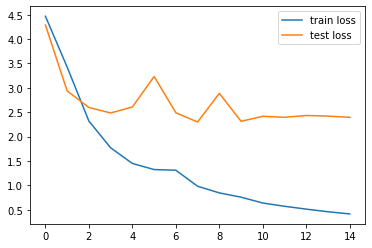

In [26]:
# plot losses
pylt.plot(r.history['loss'], label="train loss")
pylt.plot(r.history['val_loss'], label="test loss")
pylt.legend()
pylt.show()

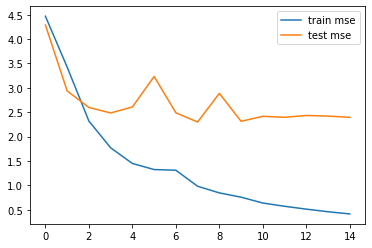

In [27]:
# plot mse
pylt.plot(r.history['mse'], label="train mse")
pylt.plot(r.history['val_mse'], label="test mse")
pylt.legend()
pylt.show()